# Exploration 12. Ìä∏ÎûúÏä§Ìè¨Î®∏Î°ú ÎßåÎìúÎäî ÎåÄÌôîÌòï Ï±óÎ¥á üë©‚ÄçüöÄ
ÏòÅÏñ¥Î°ú ÎßåÎì§ÏóàÎçò Ï±óÎ¥áÏùÑ ÌïúÍµ≠Ïñ¥ Îç∞Ïù¥ÌÑ∞Î°ú Î∞îÍøîÏÑú ÌõàÎ†®ÏãúÏºúÎ¥ÖÏãúÎã§.

## Step 1. Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÌïòÍ∏∞
Data: [ÏÜ°ÏòÅÏàôÎãòÏù¥ Í≥µÍ∞úÌïú Ï±óÎ¥á Îç∞Ïù¥ÌÑ∞](https://github.com/songys/Chatbot_data/blob/master/ChatbotData.csv)

In [1]:
# # Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
# $ mkdir -p ~/aiffel/transformer_chatbot/data/
# $ ln -s ~/data/* ~/aiffel/transformer_chatbot/data/

In [2]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
path_to_dataset = os.getenv('HOME')+'/aiffel/transformer_chatbot/data/ChatbotData .csv' 
data = pd.read_csv(path_to_dataset) 

print(path_to_dataset)

/aiffel/aiffel/transformer_chatbot/data/ChatbotData .csv


In [15]:
data.head()

Q            A  label
0           12Ïãú Îï°!   ÌïòÎ£®Í∞Ä Îòê Í∞ÄÎÑ§Ïöî.      0
1      1ÏßÄÎßù ÌïôÍµê Îñ®Ïñ¥Ï°åÏñ¥    ÏúÑÎ°úÌï¥ ÎìúÎ¶ΩÎãàÎã§.      0
2     3Î∞ï4Ïùº ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Îã§  Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.      0
3  3Î∞ï4Ïùº Ï†ïÎèÑ ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Îã§  Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.      0
4          PPL Ïã¨ÌïòÎÑ§   ÎààÏÇ¥Ïù¥ Ï∞åÌë∏Î†§ÏßÄÏ£†.      0

In [16]:
data.shape

(11823, 3)

In [17]:
data.isna().sum()

Q        0
A        0
label    0
dtype: int64

In [18]:
data['label'].unique()

array([0, 1, 2])

In [20]:
data[data['label'] == 0] # ÏùºÎ∞òÏ†ÅÏù∏ Î∞òÏùë

Q            A  label
0              12Ïãú Îï°!   ÌïòÎ£®Í∞Ä Îòê Í∞ÄÎÑ§Ïöî.      0
1         1ÏßÄÎßù ÌïôÍµê Îñ®Ïñ¥Ï°åÏñ¥    ÏúÑÎ°úÌï¥ ÎìúÎ¶ΩÎãàÎã§.      0
2        3Î∞ï4Ïùº ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Îã§  Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.      0
3     3Î∞ï4Ïùº Ï†ïÎèÑ ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Îã§  Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.      0
4             PPL Ïã¨ÌïòÎÑ§   ÎààÏÇ¥Ïù¥ Ï∞åÌë∏Î†§ÏßÄÏ£†.      0
...               ...          ...    ...
5285             ÌûòÎÇ¥ÏïºÏßÄ       ÏùëÏõêÌï©ÎãàÎã§!      0
5286      ÌûòÎì† Í≤É Ï¢Ä ÎÅùÎÇ¨ÏúºÎ©¥   Îã§ ÏßÄÎÇòÍ∞à Í±∞ÏòàÏöî.      0
5287     ÌûòÎì† ÏãúÍ∏∞Í∞Ä ÏßÄÎÇòÍ∞îÏúºÎ©¥   Îã§ ÏßÄÎÇòÍ∞à Í±∞ÏòàÏöî.      0
5288   ÌûòÎì† Îç∞ÎèÑ ÎÇ† ÎèÑÏôÄÏ§Ä ÏÇ¨Îûå  ÏûäÏßÄÎßêÍ≥† Î≥¥ÎãµÌïòÏÑ∏Ïöî.      0
5289           ÌûòÏ∞®Í≤å ÏãúÏûë       ÏùëÏõêÌï©ÎãàÎã§!      0

[5290 rows x 3 columns]

In [21]:
data[data['label'] == 1] # Î∂ÄÏ†ï

Q                          A  label
5290     1000Ïùº ÎßåÎÇú Ïó¨ÏûêÏπúÍµ¨ÏôÄ Ïù¥Î≥Ñ         Îçî Ïò§Îûò ÎßåÎÇ† ÏÇ¨Îûå ÎßåÎÇ† Í±∞ÏòàÏöî.      1
5291       10ÎÖÑ Ïó∞Ïï†. Ìó§Ïñ¥Ï°åÏäµÎãàÎã§.              Îçî Í≥µÌóàÌï®Ïù¥ ÌÅ¨ÏãúÍ≤†ÎÑ§Ïöî.      1
5292  10ÎÖÑ Ïó∞Ïï†ÏÇ¨ ÎêòÎèåÏïÑÎ≥¥Îãà Îã§ Î∂ÄÏßàÏóÜÎÑ§           Îçî Ï¢ãÏùÄ ÏÇ¨Îûå ÎßåÎÇòÏã§ Í±∞ÏòàÏöî.      1
5293              10ÎÖÑ Ïó∞ÏòàÏùòÎÅù               Îçî ÎßàÏùåÏù¥ ÌóàÌïòÍ≤†Ïñ¥Ïöî.      1
5294           10ÎÖÑÎßåÎÇòÎã§ Ìó§Ïñ¥ÏßÄÎÑ§  Ï∂©Î∂ÑÌûà Ïä¨ÌçºÌïòÍ≥† Ï∂©Î∂ÑÌûà ÏïÑÌååÌïòÎã§Í∞Ä Ïù¥Í≤®ÎÇ¥ÏÑ∏Ïöî.      1
...                    ...                        ...    ...
8855                 ÌûòÎì≠ÎãàÎã§.    Ïñ¥Îñ§ ÎßêÎèÑ ÏúÑÎ°úÍ∞Ä ÎêòÏßÄ ÏïäÍ≤†ÏßÄÎßå ÌûòÎÇ¥ÏÑ∏Ïöî.      1
8856          ÌûòÏù¥ Îê†Îü∞ÏßÄ Î™®Î•¥Í≤†ÏßÄÎßå    Ïñ¥Îñ§ ÎßêÎèÑ ÏúÑÎ°úÍ∞Ä ÎêòÏßÄ ÏïäÍ≤†ÏßÄÎßå ÌûòÎÇ¥ÏÑ∏Ïöî.      1
8857                 ÌûòÏù¥ ÎìúÎÑ§    Ïñ¥Îñ§ ÎßêÎèÑ ÏúÑÎ°úÍ∞Ä ÎêòÏßÄ ÏïäÍ≤†ÏßÄÎßå ÌûòÎÇ¥ÏÑ∏Ïöî.      1
8858                 ÌûòÏù¥ ÏóÜÏñ¥                      ÌûòÎÇ¥ÏÑ∏Ïöî!      1
8859           ÌûòÏù¥ÎìúÎÑ§.Ïó¨ÏûêÎì§Ïù¥ÎûÄ.    Ïñ¥Îñ§ ÎßêÎèÑ ÏúÑÎ°úÍ∞Ä ÎêòÏßÄ ÏïäÍ≤†ÏßÄÎßå ÌûòÎÇ¥ÏÑ∏Ïöî.      1

[3570 rows x 3 columns]

In [22]:
data[data['label'] == 2] # Í∏çÏ†ï

Q                         A  label
8860         ÏßùÏÇ¨ÎûëÎßåÌÅº Í≥†ÌÜµÏä§Îü¨Ïö¥ Í±¥ ÏóÜÍ≤†ÏßÄ.  ÏßùÏÇ¨Îûë ÎßåÌÅº Í∞êÏ†ïÏÜåÎ™®Í∞Ä ÌÅ∞ Í±¥ ÏóÜÏùÑ Í±∞ÏòàÏöî.      2
8861        1ÎÖÑ ÎÑòÍ≤å ÎßåÎÇ¨ÎäîÎç∞ ÏßÄÍ∏àÎèÑ Î∂àÌÉÄÏò¨Îùº         Ï†ïÏó¥Ï†ÅÏù∏ ÏÇ¨ÎûëÏùÑ ÌïòÍ≥† ÏûàÎÇòÎ¥êÏöî.      2
8862            1ÎÖÑ ÎèôÍ±∞ Ï§ëÏù∏Îç∞ Í≥ÑÏÜç Ï¢ãÏïÑ    ÏÑúÎ°ú ÍπäÍ≤å ÏïåÍ≤åÎêòÎ©¥ÏÑú Îçî Ï¢ãÏïÑÏ°åÎÇòÎ¥ÖÎãàÎã§.      2
8863               1ÎÖÑ ÎèôÍ±∞ÌïòÍ≥† Í≤∞ÌòºÌñàÏñ¥                    Ï∂ïÌïòÌï©ÎãàÎã§!      2
8864   1ÎÖÑ ÎßåÎÇ¨ÎäîÎç∞ÎèÑ Í∑∏ ÏÇ¨ÎûåÏóê ÎåÄÌï¥ Ïûò Î™®Î•¥Í≤†Ïñ¥                  Îçî ÎßåÎÇòÎ≥¥ÏÑ∏Ïöî.      2
...                         ...                       ...    ...
11818            ÌõîÏ≥êÎ≥¥Îäî Í≤ÉÎèÑ ÎààÏπò Î≥¥ÏûÑ.        Ìã∞Í∞Ä ÎÇòÎãàÍπå ÎààÏπòÍ∞Ä Î≥¥Ïù¥Îäî Í±∞Ï£†!      2
11819            ÌõîÏ≥êÎ≥¥Îäî Í≤ÉÎèÑ ÎààÏπò Î≥¥ÏûÑ.             ÌõîÏ≥êÎ≥¥Îäî Í±∞ Ìã∞ÎÇòÎÇòÎ¥êÏöî.      2
11820               ÌùëÍ∏∞ÏÇ¨ Ìï¥Ï£ºÎäî ÏßùÎÇ®.                    ÏÑ§Î†úÍ≤†Ïñ¥Ïöî.      2
11821   ÌûòÎì† Ïó∞Ïï† Ï¢ãÏùÄ Ïó∞Ïï†ÎùºÎäîÍ≤å Î¨¥Ïä® Ï∞®Ïù¥ÏùºÍπå?  Ïûò Ìó§Ïñ¥Ïßà Ïàò ÏûàÎäî ÏÇ¨Ïù¥ Ïó¨Î∂ÄÏù∏ Í±∞ Í∞ôÏïÑÏöî.      2
11822                ÌûòÎì§Ïñ¥ÏÑú Í≤∞ÌòºÌï†ÍπåÎ¥ê        ÎèÑÌîºÏÑ± Í≤∞ÌòºÏùÄ ÌïòÏßÄ ÏïäÍ∏∏ Î∞îÎùºÏöî.      2

[2963 rows x 3 columns]

- ÎùºÎ≤®Ïùò ÏùòÎØ∏Í∞Ä Í∂ÅÍ∏àÌï¥ÏÑú ÌïúÎ≤à Î¨∂Ïñ¥ÏÑú Ï∂úÎ†•Ìï¥Î≥¥ÏïòÎçîÎãà Í∞ÅÍ∞Å ÏùºÎ∞ò, Î∂ÄÏ†ï, Í∏çÏ†ïÏù∏ ÎåÄÌôîÍ∞Ä ÎÇòÏò§Îäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

## Step 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ÌïòÍ∏∞
ÏòÅÏñ¥ Îç∞Ïù¥ÌÑ∞ÏôÄÎäî Ï†ÑÌòÄ Îã§Î•∏ Îç∞Ïù¥ÌÑ∞Ïù∏ ÎßåÌÅº ÏòÅÏñ¥ Îç∞Ïù¥ÌÑ∞Ïóê ÏÇ¨Ïö©ÌñàÎçò Ï†ÑÏ≤òÎ¶¨ÏôÄ ÏùºÎ∂Ä ÎèôÏùºÌïú Ï†ÑÏ≤òÎ¶¨ÎèÑ ÌïÑÏöîÌïòÍ≤†ÏßÄÎßå,  
Ï†ÑÏ≤¥Ï†ÅÏúºÎ°úÎäî Îã§Î•∏ Ï†ÑÏ≤òÎ¶¨Î•º ÏàòÌñâÌï¥Ïïº Ìï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

In [23]:
# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()

    # Îã®Ïñ¥ÏôÄ Íµ¨ÎëêÏ†ê(punctuation) ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
    # ÏòàÎ•º Îì§Ïñ¥ÏÑú "I am a student." => "I am a student ."ÏôÄ Í∞ôÏù¥
    # studentÏôÄ Ïò®Ï†ê ÏÇ¨Ïù¥Ïóê Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence) # [?.!,] Í∑∏Î£πÏùÑ Ï∞æÏïÑÎùº
    sentence = re.sub(r'[" "]+', " ", sentence) # ÎùÑÏñ¥Ïì∞Í∏∞

    # (ÌïúÍ∏Ä, Ïà´Ïûê, a-z, A-Z, ".", "?", "!", ",")Î•º Ï†úÏô∏Ìïú Î™®Îì† Î¨∏ÏûêÎ•º Í≥µÎ∞±Ïù∏ ' 'Î°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.
    sentence = re.sub(r"[^Í∞Ä-Ìû£0-9a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.strip() # Îß® Ïïû, Îí§ Í≥µÎ∞± Ï†úÍ±∞ Í∞ÄÎä•
    return sentence

#### - Ï†ÑÏ≤òÎ¶¨Í∞Ä ÏûòÎêòÎäîÏßÄ Ï†ÑÌõÑ ÎπÑÍµê Î∞è ÌôïÏù∏

In [26]:
df['A']

0                      ÌïòÎ£®Í∞Ä Îòê Í∞ÄÎÑ§Ïöî.
1                       ÏúÑÎ°úÌï¥ ÎìúÎ¶ΩÎãàÎã§.
2                     Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.
3                     Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.
4                      ÎààÏÇ¥Ïù¥ Ï∞åÌë∏Î†§ÏßÄÏ£†.
                   ...           
11818          Ìã∞Í∞Ä ÎÇòÎãàÍπå ÎààÏπòÍ∞Ä Î≥¥Ïù¥Îäî Í±∞Ï£†!
11819               ÌõîÏ≥êÎ≥¥Îäî Í±∞ Ìã∞ÎÇòÎÇòÎ¥êÏöî.
11820                      ÏÑ§Î†úÍ≤†Ïñ¥Ïöî.
11821    Ïûò Ìó§Ïñ¥Ïßà Ïàò ÏûàÎäî ÏÇ¨Ïù¥ Ïó¨Î∂ÄÏù∏ Í±∞ Í∞ôÏïÑÏöî.
11822          ÎèÑÌîºÏÑ± Í≤∞ÌòºÏùÄ ÌïòÏßÄ ÏïäÍ∏∏ Î∞îÎùºÏöî.
Name: A, Length: 11823, dtype: object

In [29]:
preprocess_sentence(df['A'].values[-1])

'ÎèÑÌîºÏÑ± Í≤∞ÌòºÏùÄ ÌïòÏßÄ ÏïäÍ∏∏ Î∞îÎùºÏöî .'

In [30]:
# ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏù∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Íµ¨ÏÑ±ÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ìï®Ïàò
def load_conversations():
    
    inputs, outputs = [], []
    
    for i in range(len(df)-1):
        # Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º ÏßàÎ¨∏Ïóê Ìï¥ÎãπÎêòÎäî inputsÏôÄ ÎãµÎ≥ÄÏóê Ìï¥ÎãπÎêòÎäî outputsÏóê Ï†ÅÏö©.
        inputs.append(preprocess_sentence(df['Q'].values[i]))
        outputs.append(preprocess_sentence(df['A'].values[i]))
        
    return inputs, outputs

In [31]:
# Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥† Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ ÏßàÎ¨∏ÏùÑ questions, ÎãµÎ≥ÄÏùÑ answersÏóê Ï†ÄÏû•Ìï©ÎãàÎã§.
questions, answers = load_conversations()
print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(questions))
print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(answers))

Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 11822
Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 11822


In [32]:
import random

ran = random.randint(0, len(questions))

print('Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò {}Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: {}'.format(ran+1, questions[ran]))
print('Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò {}Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: {}'.format(ran+1, answers[ran]))

Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 2588Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: ÏàòÏóº Í∏∞Î•ºÍπå
Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 2588Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: Í∏∏Îü¨ÎèÑ Ïñ¥Ïö∏Î¶¨Î©¥ Í∏∏Îü¨Î≥¥ÏÑ∏Ïöî .


## Step 3. SubwordTextEncoder ÏÇ¨Ïö©ÌïòÍ∏∞
ÌïúÍµ≠Ïñ¥ Îç∞Ïù¥ÌÑ∞Îäî ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÏùÑ Ìï¥Ïïº ÌïúÎã§Í≥† ÎßéÏùÄ Î∂ÑÏù¥ ÏïåÍ≥† ÏûàÏäµÎãàÎã§.  
ÌïòÏßÄÎßå Ïó¨Í∏∞ÏÑúÎäî ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Í∞Ä ÏïÑÎãå ÏúÑ Ïã§ÏäµÏóêÏÑú ÏÇ¨Ïö©ÌñàÎçò ÎÇ¥Î∂Ä Îã®Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏù∏ SubwordTextEncoderÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï¥Î≥¥ÏÑ∏Ïöî.

### (1) Îã®Ïñ¥Ïû•(Vocabulary) ÎßåÎì§Í∏∞

In [33]:
import tensorflow_datasets as tfds

# ÏßàÎ¨∏Í≥º ÎãµÎ≥Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ÏÑú Vocabulary ÏÉùÏÑ±. (Tensorflow 2.3.0 Ïù¥ÏÉÅ) (ÌÅ¥ÎùºÏö∞ÎìúÎäî 2.4 ÏûÖÎãàÎã§)
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

In [34]:
tokenizer.subwords[:10]

[' .', ' ?', 'Í±∞ÏòàÏöî', 'Ïàò_', 'Í≤å_', 'ÎÑàÎ¨¥_', 'Îçî_', 'Í±∞_', 'Ï¢ãÏïÑÌïòÎäî_', 'Îäî_']

In [35]:
# ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïóê Í≥†Ïú†Ìïú Ï†ïÏàòÎ•º Î∂ÄÏó¨Ìï©ÎãàÎã§.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

In [36]:
print('START_TOKENÏùò Î≤àÌò∏ :' , START_TOKEN, [tokenizer.vocab_size])
print('END_TOKENÏùò Î≤àÌò∏ :' , END_TOKEN, [tokenizer.vocab_size + 1])

START_TOKENÏùò Î≤àÌò∏ : [8161] [8161]
END_TOKENÏùò Î≤àÌò∏ : [8162] [8162]


In [37]:
# ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ Í≥†Î†§ÌïòÏó¨ +2Î•º ÌïòÏó¨ Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞Î•º ÏÇ∞Ï†ïÌï©ÎãàÎã§.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8163


### (2) Í∞Å Îã®Ïñ¥Î•º Í≥†Ïú†Ìïú Ï†ïÏàòÎ°ú Ïù∏ÏΩîÎî©(Integer encoding) & Ìå®Îî©(Padding)
#### tokenizer.encode()Ïùò ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©Ìï¥Î≥¥Í∏∞

In [40]:
# ÏûÑÏùòÏùò 22Î≤àÏß∏ ÏÉòÌîåÏóê ÎåÄÌï¥ÏÑú Ï†ïÏàò Ïù∏ÏΩîÎî© ÏûëÏóÖÏùÑ ÏàòÌñâ.
# Í∞Å ÌÜ†ÌÅ∞ÏùÑ Í≥†Ïú†Ìïú Ï†ïÏàòÎ°ú Î≥ÄÌôò
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 40Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: {}'.format(tokenizer.encode(questions[40])))
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 40Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: {}'.format(tokenizer.encode(answers[40])))

Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 40Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: [7860, 1715, 319, 4878]
Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 40Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: [1715, 10, 4632, 63, 3326, 5190, 83, 1]


In [41]:
questions[40]

'Í∞ÑÎßåÏóê Îñ®Î¶¨ÎãàÍπå Ï¢ãÎçîÎùº'

#### ÏßàÎ¨∏Í≥º ÎãµÎ≥Ä ÏÖãÏóê ÎåÄÌï¥ Î™®Îëê Ï†ïÏàò Ïù∏ÏΩîÎî©ÏùÑ ÏàòÌñâÌïòÍ≥†, Ïù¥ÏôÄ ÎèôÏãúÏóê Î¨∏Ïû•Ïùò ÏµúÎåÄ Í∏∏Ïù¥Î•º ÏÑ§Ï†ïÌï¥ Ìå®Îî©(padding) ÌïòÍ∏∞

In [42]:
# ÏÉòÌîåÏùò ÏµúÎåÄ ÌóàÏö© Í∏∏Ïù¥ ÎòêÎäî Ìå®Îî© ÌõÑÏùò ÏµúÏ¢Ö Í∏∏Ïù¥
MAX_LENGTH = 20
print(MAX_LENGTH)

20


In [43]:
# Ï†ïÏàò Ïù∏ÏΩîÎî©, ÏµúÎåÄ Í∏∏Ïù¥Î•º Ï¥àÍ≥ºÌïòÎäî ÏÉòÌîå Ï†úÍ±∞, Ìå®Îî©
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
  
    for (sentence1, sentence2) in zip(inputs, outputs):
        # Ï†ïÏàò Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏóêÏÑú ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ Ï∂îÍ∞Ä
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        # ÏµúÎåÄ Í∏∏Ïù¥ 40 Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ÏóêÎßå Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌóàÏö©
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)
  
    # ÏµúÎåÄ Í∏∏Ïù¥ 40ÏúºÎ°ú Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ìå®Îî©
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
    return tokenized_inputs, tokenized_outputs

In [44]:
questions, answers = tokenize_and_filter(questions, answers)
print('Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ :',(VOCAB_SIZE))
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: {}'.format(len(questions)))
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: {}'.format(len(answers)))

Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ : 8163
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: 11791
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: 11791


### (3) ÍµêÏÇ¨ Í∞ïÏöî(Teacher Forcing) ÏÇ¨Ïö©ÌïòÍ∏∞

In [45]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# ÎîîÏΩîÎçîÎäî Ïù¥Ï†ÑÏùò targetÏùÑ Îã§ÏùåÏùò inputÏúºÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# Ïù¥Ïóê Îî∞Îùº outputsÏóêÏÑúÎäî START_TOKENÏùÑ Ï†úÍ±∞ÌïòÍ≤†ÏäµÎãàÎã§.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

## Step 4. Î™®Îç∏ Íµ¨ÏÑ±ÌïòÍ∏∞
ÏúÑ Ïã§Ïäµ ÎÇ¥Ïö©ÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌï©ÎãàÎã§.

### (1) Positional Encoding
- Î¨∏Ïû•Ïùò ÏúÑÏπò(position) Ï†ïÎ≥¥ Î≤°ÌÑ∞Î•º Ïù∏ÏΩîÎî©Ìï©ÎãàÎã§.

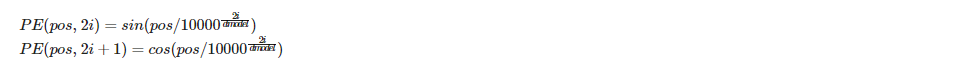

In [46]:
# Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)
        
    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles
    
    def positional_encoding(self, position, d_model):
        # Í∞ÅÎèÑ Î∞∞Ïó¥ ÏÉùÏÑ±
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        # Î∞∞Ïó¥Ïùò ÏßùÏàò Ïù∏Îç±Ïä§ÏóêÎäî sin Ìï®Ïàò Ï†ÅÏö©
        sines = tf.math.sin(angle_rads[:, 0::2])
        # Î∞∞Ïó¥Ïùò ÌôÄÏàò Ïù∏Îç±Ïä§ÏóêÎäî cosine Ìï®Ïàò Ï†ÅÏö©
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # sinÍ≥º cosineÏù¥ ÍµêÏ∞®ÎêòÎèÑÎ°ù Ïû¨Î∞∞Ïó¥
        pos_encoding = tf.stack([sines, cosines], axis=0)
        pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])

        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)
    
    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

### (2) Scaled Dot Product Attention
- Îã®Ïñ¥ ÏÇ¨Ïù¥Ïùò Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨Ìï¥ ÌïôÏäµ Î∞è ÏòàÏ∏°Ïóê ÌôúÏö©Ìï©ÎãàÎã§.


In [47]:
# Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
def scaled_dot_product_attention(query, key, value, mask):
    
    # Ïñ¥ÌÖêÏÖò Í∞ÄÏ§ëÏπòÎäî QÏôÄ KÏùò Îã∑ ÌîÑÎ°úÎçïÌä∏
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    
    # Í∞ÄÏ§ëÏπòÎ•º Ï†ïÍ∑úÌôî
    depth = tf.cast(tf.shape(key)[-1], tf.float32) # Ïã§ÏàòÌòï(float32)ÏúºÎ°ú Î≥ÄÌôò(cast)
    logits = matmul_qk / tf.math.sqrt(depth)
    
    # Ìå®Îî©Ïóê ÎßàÏä§ÌÅ¨ Ï∂îÍ∞Ä
    if mask is not None:
        logits += (mask * -1e9) # ÏùåÏùò Î¨¥ÌïúÎåÄÏóê Í∞ÄÍπåÏõÄ
        
    # softmaxÏ†ÅÏö©
    attention_weights = tf.nn.softmax(logits, axis=-1)
    
    # ÏµúÏ¢Ö Ïñ¥ÌÖêÏÖòÏùÄ Í∞ÄÏ§ëÏπòÏôÄ VÏùò Îã∑ ÌîÑÎ°úÎçïÌä∏
    output = tf.matmul(attention_weights, value)
    return output

### (3) Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò
- Ïñ¥ÌÖêÏÖòÏùÑ Î≥ëÎ†¨Î°ú ÏàòÌñâÌï©ÎãàÎã§
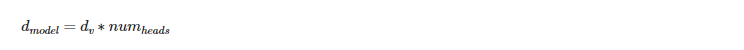

In [48]:
class MultiHeadAttention(tf.keras.layers.Layer):
    
    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0 # ÎÇòÎ®∏ÏßÄ

        self.depth = d_model // self.num_heads # Î™´ Ï†ïÏàòÎ∂ÄÎ∂ÑÎßå

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # Q, K, VÏóê Í∞ÅÍ∞Å DenseÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # Î≥ëÎ†¨ Ïó∞ÏÇ∞ÏùÑ ÏúÑÌïú Î®∏Î¶¨Î•º Ïó¨Îü¨ Í∞ú ÎßåÎì≠ÎãàÎã§
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # Ïñ¥ÌÖêÏÖò Ïó∞ÏÇ∞ ÌõÑÏóê Í∞Å Í≤∞Í≥ºÎ•º Îã§Ïãú Ïó∞Í≤∞(concatenate)Ìï©ÎãàÎã§
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        # ÏµúÏ¢Ö Í≤∞Í≥ºÏóêÎèÑ DenseÎ•º Ìïú Î≤à Îçî Ï†ÅÏö©Ìï©ÎãàÎã§
        outputs = self.dense(concat_attention)

        return outputs

### (4) Padding Masking
- Î¨∏Ïû• Í∏∏Ïù¥Î•º ÎèôÏùºÌïòÍ≤å ÎßûÏ∂îÍ∏∞ ÏúÑÌïú PaddingÏãú Ï±ÑÏö¥ 0 Í∞íÏùÑ Ïó∞ÏÇ∞Ïóê ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏäµÎãàÎã§.
- Ïù¥Î•º ÏúÑÌï¥ Ïà´Ïûê 0Ïù∏ ÏúÑÏπòÎ•º Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

In [49]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32) # 0Ïù∏ Î∂ÄÎ∂ÑÏóêÏÑú 1ÏùÑ Ï∂úÎ†•
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]

### (5) Look-ahead masking
- Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî Î¨∏Ïû• ÌñâÎ†¨ÏùÑ ÎßåÎì§Ïñ¥ Ìïú Î≤àÏóê ÌñâÎ†¨ ÌòïÌÉúÎ°ú ÏûÖÎ†•Ïóê Îì§Ïñ¥Í∞ÄÎØÄÎ°ú ÏàúÏÑúÎ•º ÎßàÏä§ÌÇπ Ìï¥Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§. 

In [50]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    
    return tf.maximum(look_ahead_mask, padding_mask)

### (6) Encoder
- Ïù∏ÏΩîÎçî Ï∏µÏùÄ ÌÅ¨Í≤å 2Í∞úÏùò sublayerÏù∏ ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò(ÏûÖÎ†• Îã®Ïñ¥ - ÏûÖÎ†• Îã®Ïñ¥Ïùò Ïú†ÏÇ¨ÎèÑ)Ï∏µÍ≥º ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßù(ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µ)ÏúºÎ°ú ÎÇòÎâ©ÎãàÎã§
- ÏûÖÎ†• Î¨∏Ïû•ÏùÑ Î∞õÏïÑ Ï†ïÎ≥¥Î•º ÏñªÍ≥†, ÎîîÏΩîÎçîÏóê Ï†ÑÎã¨ÌïòÎäî Ïù∏ÏΩîÎçî(ÏûÖÎ†• Ï≤òÎ¶¨)ÏûÖÎãàÎã§.
- **Ïù∏ÏΩîÎçî ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò**: **Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò**ÏúºÎ°ú Î≥ëÎ†¨Ï†ÅÏúºÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏäµÎãàÎã§.

In [52]:
# Ïù∏ÏΩîÎçî ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥Î•º Ìï®ÏàòÎ°ú Íµ¨ÌòÑ.
# Ïù¥ ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥ ÏïàÏóêÎäî Îëê Í∞úÏùò ÏÑúÎ∏å Î†àÏù¥Ïñ¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÇ¨Ïö©
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention")({
            'query': inputs,
            'key': inputs,
            'value': inputs,
            'mask': padding_mask
        })

    # Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º Layer NormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)

    # Îëê Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : 2Í∞úÏùò ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

#### Ïù∏ÏΩîÎçî Ï∏µ: ÏûÑÎ≤†Îî© Ï∏µ(Embedding Layer)Í≥º Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©(Positional Encoding) Ïó∞Í≤∞

In [54]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÇ¨Ïö©
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # num_layersÎßåÌÅº ÏåìÏïÑÏò¨Î¶∞ Ïù∏ÏΩîÎçîÏùò Ï∏µ.
    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="encoder_layer_{}".format(i),
        )([outputs, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

## (7) Decoder
- Ïù∏ÏΩîÎçîÏóêÏÑú Ï†ïÎ≥¥Î•º Î∞õÏïÑ Î¨∏Ïû•ÏùÑ ÏÉùÏÑ±ÌïòÎäî ÎîîÏΩîÎçî(Ï∂úÎ†•)ÏûÖÎãàÎã§.
- ÎîîÏΩîÎçîÎäî Ï¥ù 3Í∞úÏùò sublayerÎ°ú Íµ¨ÏÑ±Îê©ÎãàÎã§.
- ÎîîÏΩîÎçî ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò(Ï∂úÎ†• Îã®Ïñ¥ - Ï∂úÎ†• Îã®Ïñ¥Ïùò Ïú†ÏÇ¨ÎèÑ)Ï∏µÍ≥º Ïù∏ÏΩîÎçî ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖò(ÏûÖÎ†• Îã®Ïñ¥ - Ï∂úÎ†• Îã®Ïñ¥Ïùò Ïú†ÏÇ¨ÎèÑ)Ï∏µ, Í∑∏Î¶¨Í≥† ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µÏù¥ Ìè¨Ìï®Îê©ÎãàÎã§.

In [55]:
# ÎîîÏΩîÎçî ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥Î•º Ìï®ÏàòÎ°ú Íµ¨ÌòÑ.
# Ïù¥ ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥ ÏïàÏóêÎäî ÏÑ∏ Í∞úÏùò ÏÑúÎ∏å Î†àÏù¥Ïñ¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
            'query': inputs,
            'key': inputs,
            'value': inputs,
            'mask': look_ahead_mask
        })

    # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
    attention1 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention1 + inputs)

    # Îëê Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : ÎßàÏä§ÌÅ¨Îìú Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖò)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
            'query': attention1,
            'key': enc_outputs,
            'value': enc_outputs,
            'mask': padding_mask
        })

    # ÎßàÏä§ÌÅ¨Îìú Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî
    # DropoutÍ≥º LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)

    # ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : 2Í∞úÏùò ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º LayerNormalization ÏàòÌñâ
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

#### ÎîîÏΩîÎçî Ï∏µÏùÄ ÏûÑÎ≤†Îî© Ï∏µ(Embedding Layer)Í≥º Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©(Positional Encoding) ÏùÑ Ïó∞Í≤∞Ìïú ÌõÑ ÏõêÌïòÎäî ÎßåÌÅº ÎîîÏΩîÎçî Ï∏µÏùÑ ÏåìÏïÑ ÏôÑÏÑ±

In [56]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name='look_ahead_mask')

    # Ìå®Îî© ÎßàÏä§ÌÅ¨
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
    # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    # DropoutÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = decoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

## (8) Ìä∏ÎûúÏä§Ìè¨Î®∏ Ìï®Ïàò
- Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÎ•º Í≤∞Ìï©Ìï©ÎãàÎã§.

In [64]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # Ïù∏ÏΩîÎçîÏóêÏÑú Ìå®Îî©ÏùÑ ÏúÑÌïú ÎßàÏä§ÌÅ¨
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # ÎîîÏΩîÎçîÏóêÏÑú ÎØ∏ÎûòÏùò ÌÜ†ÌÅ∞ÏùÑ ÎßàÏä§ÌÅ¨ ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    # ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Ìå®Îî© ÎßàÏä§ÌÅ¨ÎèÑ Ìè¨Ìï®ÎêòÏñ¥Ï†∏ ÏûàÏäµÎãàÎã§.
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask,
        output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # Îëê Î≤àÏß∏ Ïñ¥ÌÖêÏÖò Î∏îÎ°ùÏóêÏÑú Ïù∏ÏΩîÎçîÏùò Î≤°ÌÑ∞Îì§ÏùÑ ÎßàÏä§ÌÇπ
    # ÎîîÏΩîÎçîÏóêÏÑú Ìå®Îî©ÏùÑ ÏúÑÌïú ÎßàÏä§ÌÅ¨
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    # Ïù∏ÏΩîÎçî
    enc_outputs = encoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[inputs, enc_padding_mask])

    # ÎîîÏΩîÎçî
    dec_outputs = decoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

## Step 5. Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌõàÎ†®ÌïòÍ∏∞
### (1) Î™®Îç∏ ÏÉùÏÑ±

In [65]:
tf.keras.backend.clear_session()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
NUM_LAYERS = 2 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÏùò Ï∏µÏùò Í∞úÏàò
D_MODEL = 256 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÎÇ¥Î∂ÄÏùò ÏûÖ, Ï∂úÎ†•Ïùò Í≥†Ï†ï Ï∞®Ïõê
NUM_HEADS = 8 # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏóêÏÑúÏùò Ìó§Îìú Ïàò 
UNITS = 512 # ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏùò ÏùÄÎãâÏ∏µÏùò ÌÅ¨Í∏∞
DROPOUT = 0.1 # ÎìúÎ°≠ÏïÑÏõÉÏùò ÎπÑÏú®

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3143936     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

### (2) ÏÜêÏã§ Ìï®Ïàò(Loss Function)
- Î†àÏù¥Î∏îÏù∏ ÏãúÌÄÄÏä§Ïóê Ìå®Îî©Ïù¥ ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú, lossÎ•º Í≥ÑÏÇ∞Ìï† Îïå Ìå®Îî© ÎßàÏä§ÌÅ¨Î•º Ï†ÅÏö©Ìï¥Ïïº Ìï©ÎãàÎã§

In [67]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

### (3) Ïª§Ïä§ÌÖÄ Îêú ÌïôÏäµÎ•† (Learning rate)
- Î™®Îç∏ÌïôÏäµ Ï¥àÍ∏∞Ïóê lrÏùÑ Í∏âÍ≤©Ìûà ÎÜíÌòîÎã§Í∞Ä train stepÏù¥ ÏßÑÌñâÎê®Ïóê Îî∞Îùº ÏÑúÏÑúÌûà ÎÇÆÏ∂îÏñ¥ Í∞ÄÎ©∞ ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏàòÎ†¥ÌïòÍ≤å ÌïòÎäî Í∏∞Î≤ï

In [68]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step) # Ï†úÍ≥±Í∑ºÏùò Ïó≠Ïàò
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Text(0.5, 0, 'Train Step')

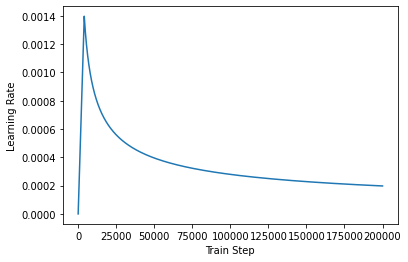

In [70]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

### (4) Î™®Îç∏ Ïª¥ÌååÏùº

In [71]:
# Î™®Îç∏ Ïª¥ÌååÏùº
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [72]:
# Î™®Îç∏ ÌõàÎ†®

EPOCHS = 20
history = model.fit(dataset, epochs = EPOCHS, verbose =1)

Epoch 1/20
185/185 [==============================] - 13s 37ms/step - loss: 2.9654 - accuracy: 0.0528
Epoch 2/20
185/185 [==============================] - 7s 36ms/step - loss: 2.4096 - accuracy: 0.1011
Epoch 3/20
185/185 [==============================] - 7s 36ms/step - loss: 2.0485 - accuracy: 0.1036
Epoch 4/20
185/185 [==============================] - 7s 36ms/step - loss: 1.8906 - accuracy: 0.1110
Epoch 5/20
185/185 [==============================] - 7s 37ms/step - loss: 1.7712 - accuracy: 0.1177
Epoch 6/20
185/185 [==============================] - 7s 37ms/step - loss: 1.6488 - accuracy: 0.1269
Epoch 7/20
185/185 [==============================] - 7s 37ms/step - loss: 1.5165 - accuracy: 0.1388
Epoch 8/20
185/185 [==============================] - 7s 37ms/step - loss: 1.3684 - accuracy: 0.1546
Epoch 9/20
185/185 [==============================] - 7s 37ms/step - loss: 1.2101 - accuracy: 0.1723
Epoch 10/20
185/185 [==============================] - 7s 37ms/step - loss: 1.0439 - accur

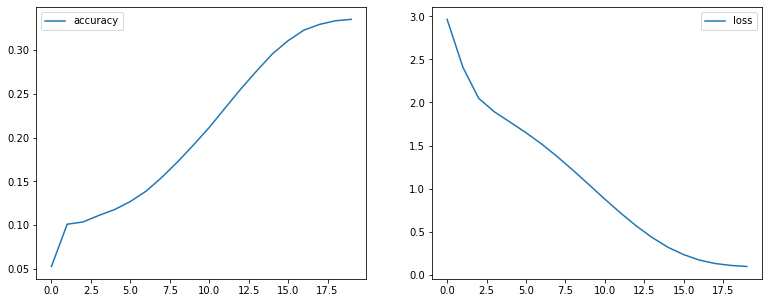

In [73]:
# ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize = (13, 5))

# Ï†ïÌôïÎèÑ
plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.legend()

# ÏÜêÏã§
plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.legend()

plt.show()

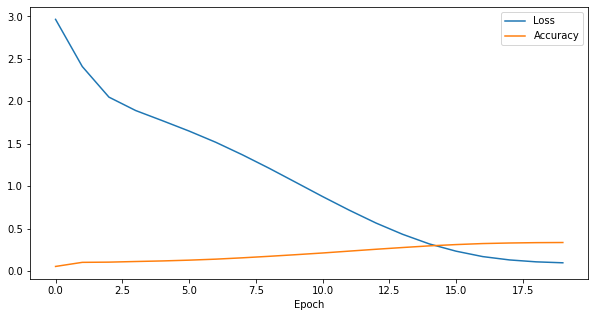

In [74]:
history.history

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'])

## Step 6. Î™®Îç∏ ÌèâÍ∞ÄÌïòÍ∏∞
Step 1ÏóêÏÑú ÏÑ†ÌÉùÌïú Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ïÏùÑ Í≥†Î†§ÌïòÏó¨ ÏûÖÎ†•Îêú Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú ÎåÄÎãµÏùÑ ÏñªÎäî ÏòàÏ∏° Ìï®ÏàòÎ•º ÎßåÎì≠ÎãàÎã§.

In [75]:
def decoder_inference(sentence):
    sentence = preprocess_sentence(sentence)

    # ÏûÖÎ†•Îêú Î¨∏Ïû•ÏùÑ Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑ, ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ ÏïûÎí§Î°ú Ï∂îÍ∞Ä.
    # ex) Where have you been? ‚Üí [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # ÎîîÏΩîÎçîÏùò ÌòÑÏû¨ÍπåÏßÄÏùò ÏòàÏ∏°Ìïú Ï∂úÎ†• ÏãúÌÄÄÏä§Í∞Ä ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÎäî Î≥ÄÏàò.
    # Ï≤òÏùåÏóêÎäî ÏòàÏ∏°Ìïú ÎÇ¥Ïö©Ïù¥ ÏóÜÏùåÏúºÎ°ú ÏãúÏûë ÌÜ†ÌÅ∞Îßå Î≥ÑÎèÑ Ï†ÄÏû•. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)

    # ÎîîÏΩîÎçîÏùò Ïù∏ÌçºÎü∞Ïä§ Îã®Í≥Ñ
    for i in range(MAX_LENGTH):
        # ÎîîÏΩîÎçîÎäî ÏµúÎåÄ MAX_LENGTHÏùò Í∏∏Ïù¥ÎßåÌÅº Îã§Ïùå Îã®Ïñ¥ ÏòàÏ∏°ÏùÑ Î∞òÎ≥µÌï©ÎãàÎã§.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]

        # ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Ïùò Ï†ïÏàò
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # ÎßåÏïΩ ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Í∞Ä Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïù¥ÎùºÎ©¥ forÎ¨∏ÏùÑ Ï¢ÖÎ£å
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # ÏòàÏ∏°Ìïú Îã®Ïñ¥Îì§ÏùÄ ÏßÄÏÜçÏ†ÅÏúºÎ°ú output_sequenceÏóê Ï∂îÍ∞ÄÎê©ÎãàÎã§.
        # Ïù¥ output_sequenceÎäî Îã§Ïãú ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Ïù¥ Îê©ÎãàÎã§.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)

In [76]:
def sentence_generation(sentence):
    # ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú ÎîîÏΩîÎçîÎ•º ÎèôÏûë ÏãúÏºú ÏòàÏ∏°Îêú Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Î¶¨ÌÑ¥Î∞õÏäµÎãàÎã§.
    prediction = decoder_inference(sentence)

    # Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Îã§Ïãú ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size])

    print('ÏûÖÎ†• : {}'.format(sentence))
    print('Ï∂úÎ†• : {}'.format(predicted_sentence))

    return predicted_sentence

In [79]:
sentence_generation("Ïò§Îäò Í∏∞Î∂ÑÏù¥ Ïñ¥Îïå?")

ÏûÖÎ†• : Ïò§Îäò Í∏∞Î∂ÑÏù¥ Ïñ¥Îïå?
Ï∂úÎ†• : ÎßõÏûàÎäî Í±∞ Î®πÍ≥† Í∏∞Î∂ÑÎã§ Î≥¥Î©¥ Í∑∏Îü¥ Í±∞ Í∞ôÏïÑÏöî .


'ÎßõÏûàÎäî Í±∞ Î®πÍ≥† Í∏∞Î∂ÑÎã§ Î≥¥Î©¥ Í∑∏Îü¥ Í±∞ Í∞ôÏïÑÏöî .'

In [77]:
sentence_generation("Ïò§Îäò Î≠êÌï¥?")

ÏûÖÎ†• : Ïò§Îäò Î≠êÌï¥?
Ï∂úÎ†• : Ïã§ÎÇ¥ Îç∞Ïù¥Ìä∏Í∞Ä Ï¢ãÍ≤†ÎÑ§Ïöî .


'Ïã§ÎÇ¥ Îç∞Ïù¥Ìä∏Í∞Ä Ï¢ãÍ≤†ÎÑ§Ïöî .'

In [81]:
sentence_generation("ÌûòÎì§ÏßÑ ÏïäÏïÑ?")

ÏûÖÎ†• : ÌûòÎì§ÏßÑ ÏïäÏïÑ?
Ï∂úÎ†• : ÏÇ¨Îûå ÎßàÎã§ Îã§Î•¥Í≤†ÏßÄÏöî .


'ÏÇ¨Îûå ÎßàÎã§ Îã§Î•¥Í≤†ÏßÄÏöî .'

In [82]:
sentence_generation("Í≥µÎ∂ÄÌïòÍ∏∞ Ïã´Ïñ¥")

ÏûÖÎ†• : Í≥µÎ∂ÄÌïòÍ∏∞ Ïã´Ïñ¥
Ï∂úÎ†• : Ïû†Ïãú Ïâ¨Ïñ¥ÎèÑ ÎèºÏöî .


'Ïû†Ïãú Ïâ¨Ïñ¥ÎèÑ ÎèºÏöî .'

In [80]:
sentence_generation("ÏïàÎÖïÌïòÏÑ∏Ïöî")

ÏûÖÎ†• : ÏïàÎÖïÌïòÏÑ∏Ïöî
Ï∂úÎ†• : ÏïàÎÖïÌïòÏÑ∏Ïöî .


'ÏïàÎÖïÌïòÏÑ∏Ïöî .'

In [83]:
data[200:201]

Q                  A  label
200  Í≥®ÌîÑ Î™ª ÏπòÎäîÎç∞  Ï≤òÏùåÎ∂ÄÌÑ∞ ÏûòÌïòÎäî ÏÇ¨ÎûåÏùÄ ÏóÜÏñ¥Ïöî.      0

## Epoch ÎäòÎ†§ÏÑú ÌïôÏäµÌï¥Î≥¥Í∏∞

In [88]:
# Î™®Îç∏ ÌõàÎ†®

EPOCHS = 50
history2 = model.fit(dataset, epochs = EPOCHS, verbose =1)

Epoch 1/50
185/185 [==============================] - 7s 37ms/step - loss: 0.0509 - accuracy: 0.3445
Epoch 2/50
185/185 [==============================] - 7s 37ms/step - loss: 0.0454 - accuracy: 0.3459
Epoch 3/50
185/185 [==============================] - 7s 37ms/step - loss: 0.0400 - accuracy: 0.3472
Epoch 4/50
185/185 [==============================] - 7s 36ms/step - loss: 0.0368 - accuracy: 0.3480
Epoch 5/50
185/185 [==============================] - 7s 37ms/step - loss: 0.0324 - accuracy: 0.3493
Epoch 6/50
185/185 [==============================] - 7s 37ms/step - loss: 0.0302 - accuracy: 0.3498
Epoch 7/50
185/185 [==============================] - 7s 37ms/step - loss: 0.0293 - accuracy: 0.3502
Epoch 8/50
185/185 [==============================] - 7s 37ms/step - loss: 0.0262 - accuracy: 0.3509
Epoch 9/50
185/185 [==============================] - 7s 37ms/step - loss: 0.0242 - accuracy: 0.3513
Epoch 10/50
185/185 [==============================] - 7s 37ms/step - loss: 0.0234 - accura

### Î™®Îç∏ ÌèâÍ∞ÄÌïòÍ∏∞

In [93]:
sentence_generation("Ïò§Îäò Í∏∞Î∂ÑÏù¥ Ïñ¥Îïå?")

ÏûÖÎ†• : Ïò§Îäò Í∏∞Î∂ÑÏù¥ Ïñ¥Îïå?
Ï∂úÎ†• : ÏÇ¨ÎûëÏóê ÎÇòÏù¥Îäî Ï§ëÏöîÌïòÏßÄ ÏïäÏïÑÏöî .


'ÏÇ¨ÎûëÏóê ÎÇòÏù¥Îäî Ï§ëÏöîÌïòÏßÄ ÏïäÏïÑÏöî .'

In [94]:
sentence_generation("Ïò§Îäò Î≠êÌï¥?")

ÏûÖÎ†• : Ïò§Îäò Î≠êÌï¥?
Ï∂úÎ†• : ÎÉâÏû•Í≥† ÌååÎ®πÍ∏∞ Ìï¥Î≥¥ÏÑ∏Ïöî .


'ÎÉâÏû•Í≥† ÌååÎ®πÍ∏∞ Ìï¥Î≥¥ÏÑ∏Ïöî .'

In [98]:
sentence_generation("Ïò§Îäò Î≠êÌïòÎãà?")

ÏûÖÎ†• : Ïò§Îäò Î≠êÌïòÎãà?
Ï∂úÎ†• : ÎúªÎåÄÎ°ú ÎêòÎäîÍ≤å ÎßéÏßÄ ÏïäÏ£† .


'ÎúªÎåÄÎ°ú ÎêòÎäîÍ≤å ÎßéÏßÄ ÏïäÏ£† .'

In [95]:
sentence_generation("Í≥µÎ∂ÄÌïòÍ∏∞ Ïã´Ïñ¥")

ÏûÖÎ†• : Í≥µÎ∂ÄÌïòÍ∏∞ Ïã´Ïñ¥
Ï∂úÎ†• : Ïû†Ïãú Ïâ¨Ïñ¥ÎèÑ ÎèºÏöî .


'Ïû†Ïãú Ïâ¨Ïñ¥ÎèÑ ÎèºÏöî .'

In [97]:
data.loc[[1235,1239]]

Q                A  label
1235    Îçî ÎÇòÏùÄ ÌïôÍµêÏÉùÌôú ÌïòÍ≥† Ïã∂Ïñ¥  ÌïòÎ£®Ïóê ÌïòÎÇòÏî© Î≥ÄÌôîÌï¥Î≥¥ÏÑ∏Ïöî.      0
1239  ÎçîÏö∞ÎãàÍπå Î¨¥ÏÑúÏö¥ Ïù¥ÏïºÍ∏∞ Îì£Í≥†Ïã∂ÏßÄ            Ìï¥Ï£ºÏÑ∏Ïöî.      0

# ÌöåÍ≥†

1. Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Îäî ÎÇòÎ¶Ñ ÏàòÏõîÌïòÍ≤å ÏßÑÌñâÎêêÍ≥† ÎÇ¥Ïö© ÏûêÏ≤¥Í∞Ä Ïû¨Î∞åÏóàÎã§. 
2. ÌäπÌûà, ÎÖ∏ÎìúÏóê ÎÇòÏôÄÏûàÏßÄ ÏïäÏùÄ labelÏùÑ Í∞ÄÏßÄÍ≥† ÎåÄÌôî ÎÇ¥Ïö©ÏùÑ Ï∂úÎ†•Ìï¥Î≥¥Îäî Î∂ÄÎ∂ÑÏù¥ Ï¢Ä Ìù•ÎØ∏Î°úÏõ†Îã§.
3. Ï≤òÏùåÏóê ÌïôÏäµÌïú Í≤∞Í≥ºÎäî ÏïÑÎûòÏ≤òÎüº Ï°∞Í∏à Ïù¥ÏÉÅÌïú Í≤ΩÏö∞Í∞Ä ÏûàÏóàÎã§, 
    - ÏûÖÎ†• : Ïò§Îäò Í∏∞Î∂ÑÏù¥ Ïñ¥Îïå?
    - Ï∂úÎ†• : ÎßõÏûàÎäî Í±∞ Î®πÍ≥† Í∏∞Î∂ÑÎã§ Î≥¥Î©¥ Í∑∏Îü¥ Í±∞ Í∞ôÏïÑÏöî .
4. epochÎ•º ÎäòÎ†§ÏÑú Îã§Ïãú ÌïôÏäµÌï¥Î≥∏ Í≤∞Í≥º Î°úÎ¥áÏù¥ Îçî Í∑∏Îü¥Ïã∏Ìïú ÎãµÎ≥ÄÏùÑ ÌïòÎäîÏßÄ Î≥¥Î†§Í≥† Îã§Ïãú Ìï¥Î¥§ÎäîÎç∞ ... Ïó¨Ï†ÑÌûà Ïù¥ÏÉÅÌñàÎã§.  
    - ÏûÖÎ†• : Ïò§Îäò Í∏∞Î∂ÑÏù¥ Ïñ¥Îïå?
    - Ï∂úÎ†• : ÏÇ¨ÎûëÏóê ÎÇòÏù¥Îäî Ï§ëÏöîÌïòÏßÄ ÏïäÏïÑÏöî .
5. Î≠êÍ∞Ä Î¨∏Ï†úÏù∏ÏßÄ ÌôïÏã§ÌïòÍ≤åÎäî Î™®Î•¥Í≤†ÏßÄÎßå Îç∞Ïù¥ÌÑ∞ ÏñëÏù¥ 11,000Í∞úÎ°ú ÎßéÏßÄÍ∞Ä ÏïäÍ≥†, Î™®Îç∏ ÏÑ±Îä• ÏûêÏ≤¥Í∞Ä ÎÇÆÍ∏∞ ÎïåÎ¨∏Ïù∏ Í≤É Í∞ôÎã§. 
    -> Î™®Îç∏ layerÎ•º Îçî ÏåìÍ±∞ÎÇò, ÎçîÏö±Îçî Ï†ïÌôïÌïú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï¥Î≥¥ÏïÑÏïº Ìï† Í≤É Í∞ôÎã§ !!